In [79]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [80]:
xv1 =[]
xv2 = []
e1 = []
e2 = []
eT = [0.1,0.1,0.1,0.1,0.1,0.1,0.1]
eI = 0.01
eV = 0.001
t = [55.5,43,37.3,29.2,21.3,1.3,-196]
r1 = 4.5
r2 = 10

In [81]:
T = np.array(t)

In [82]:
dv = pd.read_excel('Dati3_1.xlsx',usecols=(0,2,4,6,8,10,12))
index = ['row1','row2','row3','row4','row5']
di = pd.read_excel('Dati3_1.xlsx',usecols=(1,3,5,7,9,11,13))
index = ['row1','row2','row3','row4','row5']

In [83]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
print(e1)
print(e2)
plt.xlabel('V')
plt.ylabel('mA')
plt.grid(True)
plt.plot(dv,di,marker='o',linestyle='-')
plt.axhline(y = r1, color = 'blue',label ='I = 4.5mA', linestyle = '-') 
plt.axhline(y = r2, color = 'red',label ='I = 10.0mA', linestyle = '-') 
plt.legend()

In [85]:
x1 = [0.54,0.62,0.529,0.626,0.623,0.64,0.58,0.65,0.645,0.662,0.649,0.725,1.036,1.058]
y1 = [2,8,0.829,5.65,4.29,5.41,1.246,5.41,3.56,5.08,1.55,8.88,1.885,10.7]

In [86]:
for k in range(0,7):
    q = (r1-y1[(2*k)+1])*((x1[(2*k)+1]-x1[2*k])/(y1[(2*k)+1]-y1[2*k]))+x1[(2*k)+1]
    xv1.append(q)
    
x2 = [0.631,0.653,0.634,0.662,0.64,0.667,0.679,0.686,0.688,0.707,0.725,0.736,1.036,1.058]
y2 = [9.68,15.08,6.65,11.9,6.06,10.46,9.95,11.62,8.94,13.65,8.88,11.54,1.885,10.7]

In [87]:
for k in range(0,7):
    q = (r2-y2[(2*k)+1])*((x2[(2*k)+1]-x2[2*k])/(y2[(2*k)+1]-y2[2*k]))+x2[(2*k)+1]
    xv2.append(q)
    
for p in range(0,7):
    e = xv1[p]*((((r1*((x1[(2*k)+1]-x1[2*k])/(y1[(2*k)+1]-y1[2*k]))))*eI)+eV)
    e1.append(e)
    
for p in range(0,7):
    e = xv2[p]*((((r2*((x2[(2*k)+1]-x2[2*k])/(y2[(2*k)+1]-y2[2*k]))))*eI)+eV)
    e2.append(e)

Retta di r1

In [88]:
X = T
Y1 = xv1
sigma_Y1 = np.square(e1)
w1 = 1 / sigma_Y1**2
x_w1_mean = np.sum(w1*X) / np.sum(w1)
y_w1_mean = np.sum(w1*Y1) / np.sum(w1)
num = np.sum(w1 * (X - x_w1_mean) * (Y1 - y_w1_mean))
den = np.sum(w1 * (X - x_w1_mean)**2)
m1 = num / den
c1 = y_w1_mean - m1 * x_w1_mean
print(f"Coefficiente angolare (m): {m1}")
print(f"Intercetta (c): {c1}")
y_pr1 = m1 * X + c1

Coefficiente angolare (m): -0.0018682236384098517
Intercetta (c): 0.6860858836341487


Retta di r2

In [89]:
X = T
Y2 = xv2
sigma_Y2 = np.square(e2)
w2 = 1 / sigma_Y2**2
x_w2_mean = np.sum(w2*X) / np.sum(w2)
y_w2_mean = np.sum(w2*Y2) / np.sum(w2)
num = np.sum(w2 * (X - x_w2_mean) * (Y2 - y_w2_mean))
den = np.sum(w2 * (X - x_w2_mean)**2)
m2 = num / den
c2 = y_w2_mean - m2 * x_w2_mean
print(f"Coefficiente angolare (m): {m2}")
print(f"Intercetta (c): {c2}")

Coefficiente angolare (m): -0.0016996433543803502
Intercetta (c): 0.7276055575244611


In [ ]:


plt.figure()
plt.errorbar(T,xv1,e1,None,'o')
plt.errorbar(T,xv2,e2,None,'o')
plt.plot(X, y_pr1, color='blue', label='Retta stimata per r1 = 4.5mA')
y_pr2 = m2 * X + c2
plt.plot(X, y_pr2, color='red', label='Retta stimata per r2 = 10.0mA')
plt.legend()
plt.grid(True)
plt.xlabel('T(Â°C)')
plt.ylabel('V')
plt.show()

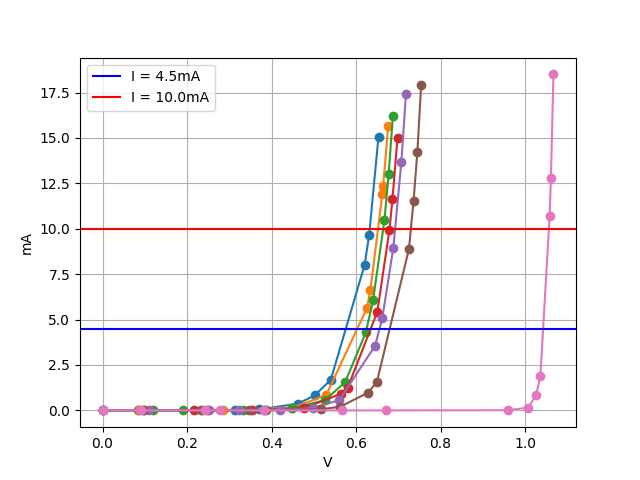

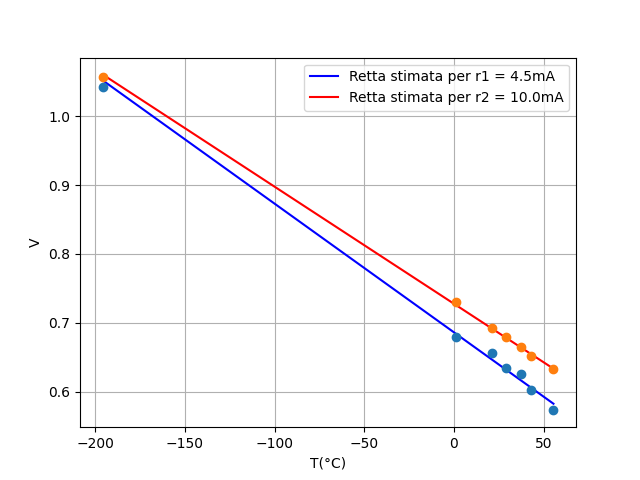